In [9]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb'
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
[Nx,Ny,Nz] = reader.domain_size
[x,y,z] = reader.readCoordinates()
yplot = y[0,:,0]

ts = 34
te = 60
xdir = 0;
zdir = 2;
print(reader.steps)

id_shift = 32-6 # for no_tkeb bc timing is offset

(0, 1, 2, 3, 4, 5, 6, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60)


In [3]:
# Get thicknesses
fname = filename_prefix+'growth.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

nstats=3
dat = np.reshape(dat,[n/nstats,nstats])
time = dat[:,0]
dtheta = dat[:,1]
domega = dat[:,2]
 
print("Thickness data available from {}-{}".format(time[0],time[np.size(time)-1]))

Thickness data available from 0.0-1180.0


(35, 9)
(40, 14)
(45, 19)
(50, 24)
(55, 29)
(60, 34)


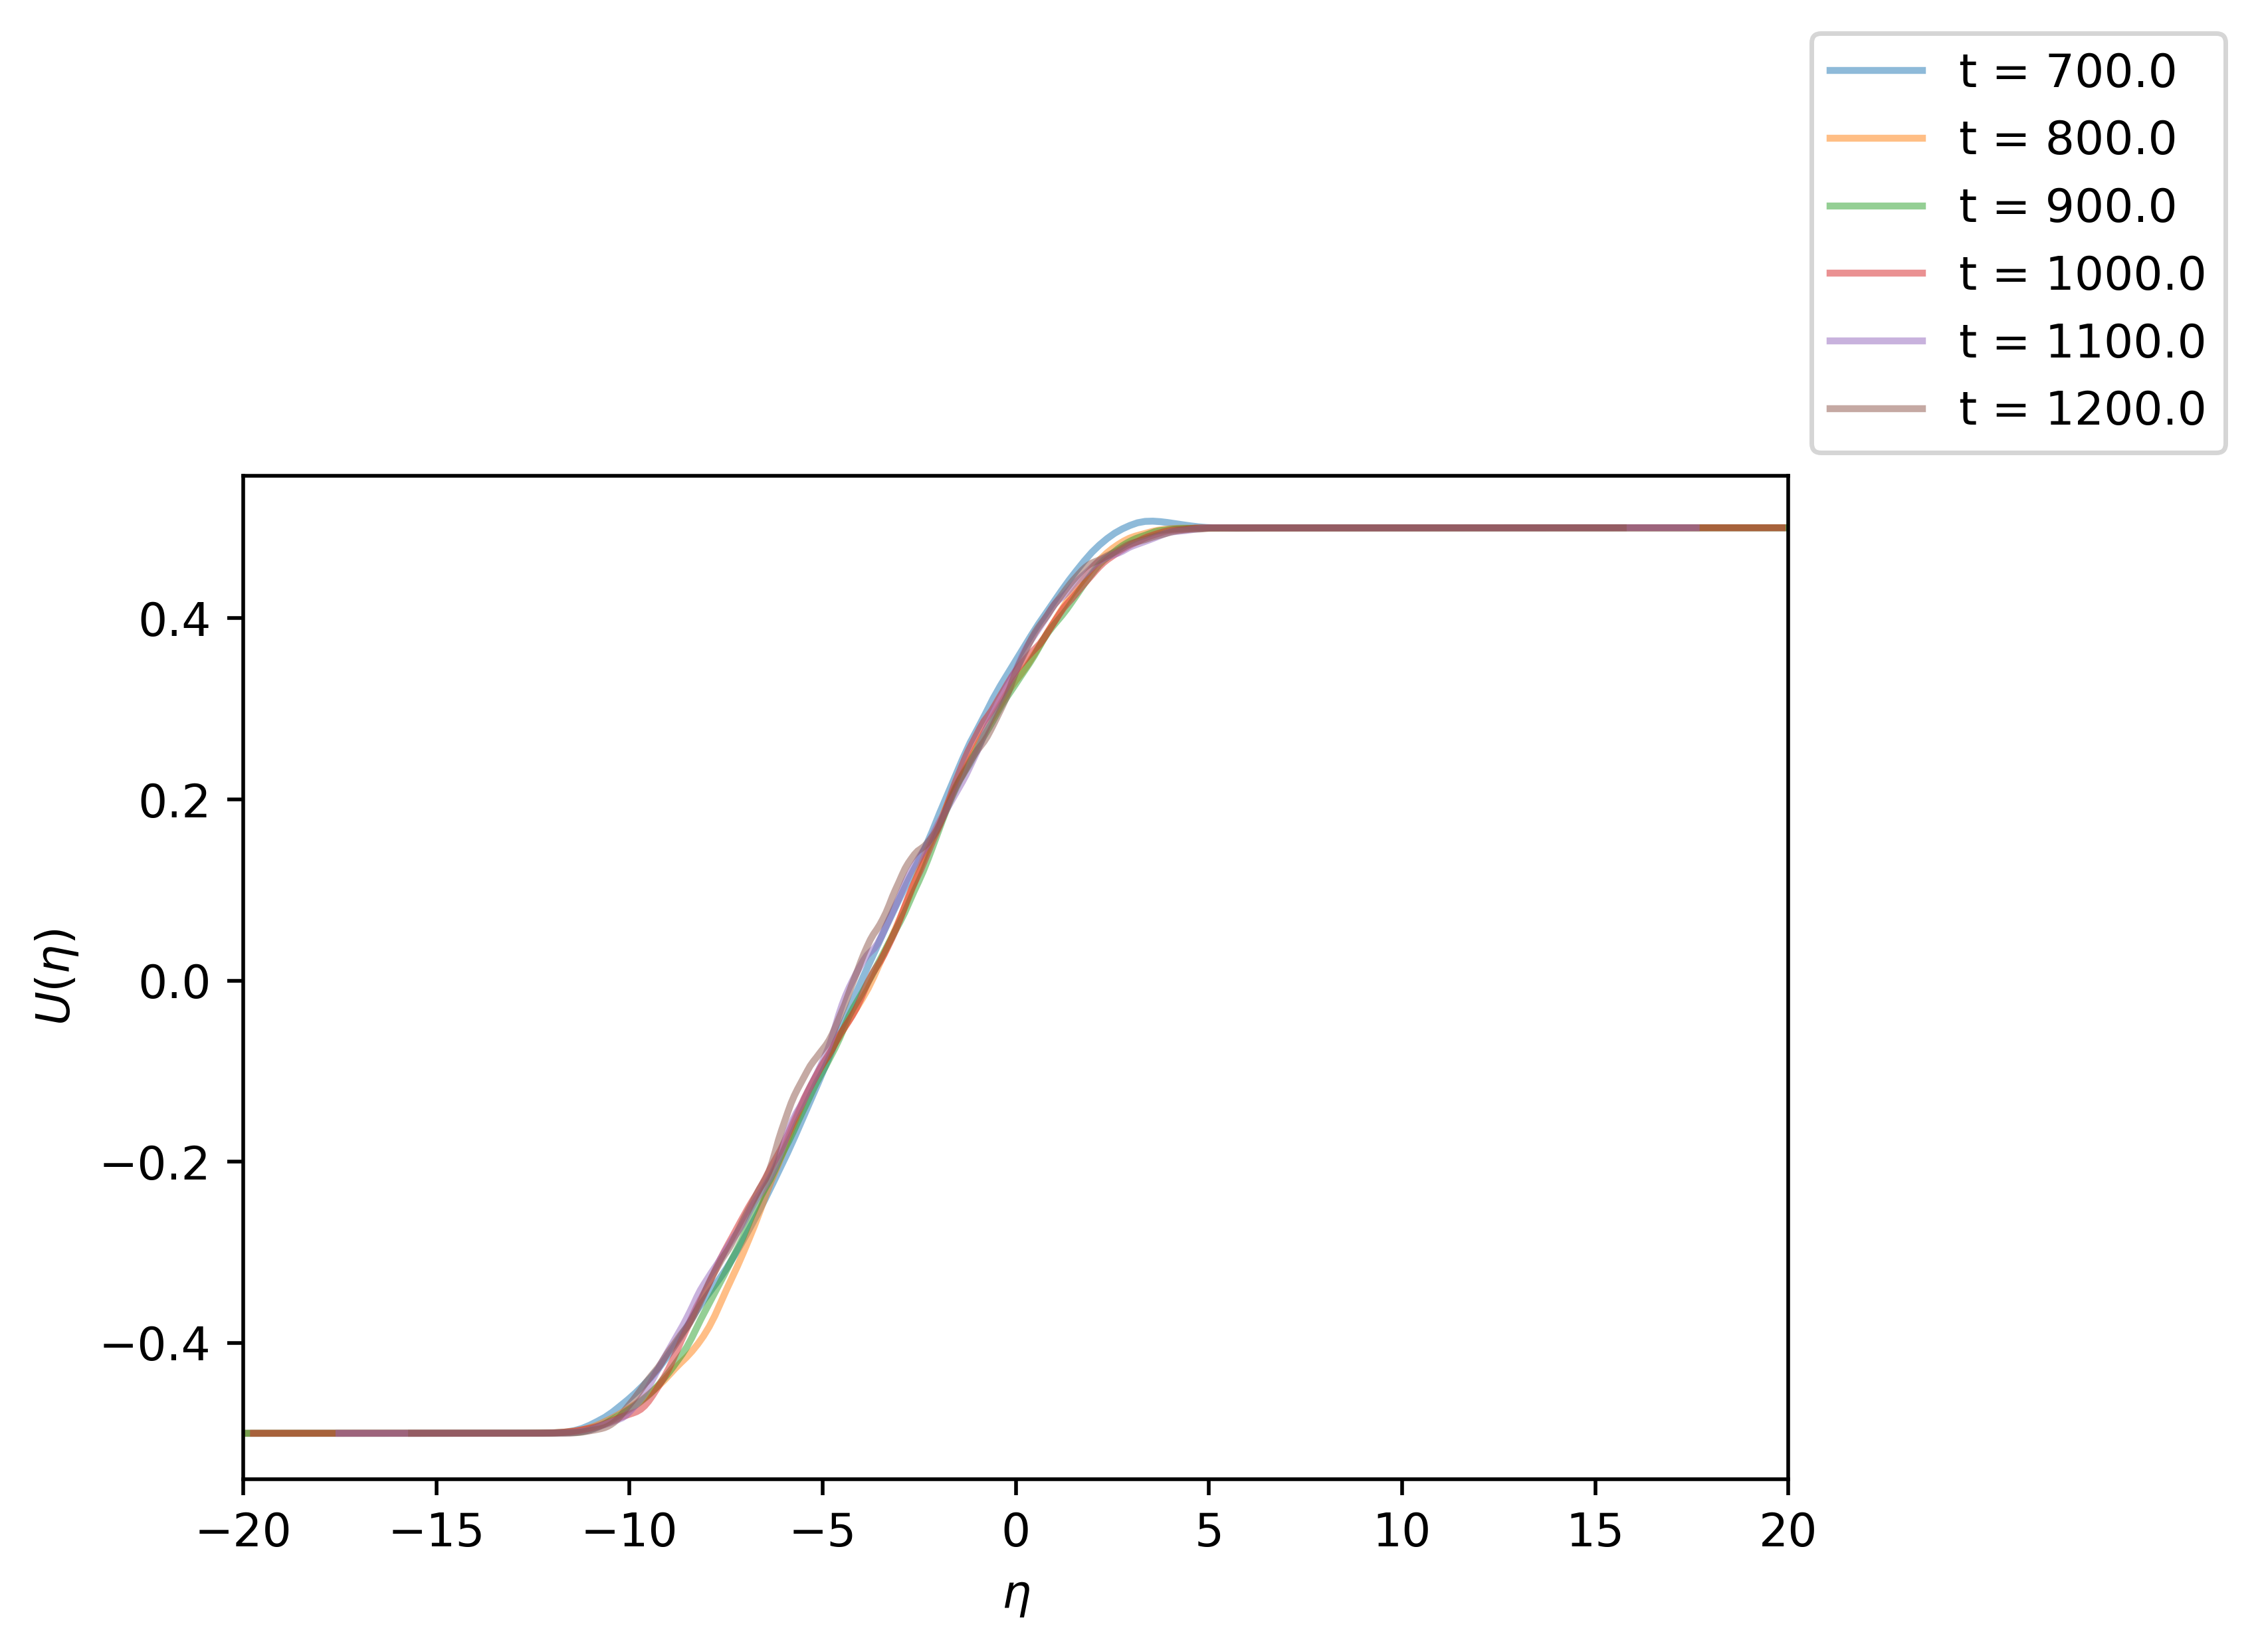

In [34]:
# Plot mean u, normalized
def mean_xz(q3D):
    tmp = np.mean(q3D,axis=zdir)
    return np.mean(tmp,axis=xdir)

plt.figure(figsize=(6,4),dpi=500)

ts = 35#57
te = 61#90
count = 0
unorm_sum = np.zeros(Ny)
for step in range(ts,te,5):
    print(step,step-id_shift)
    reader.step = step
    u = reader.readData(('u'))
    u = np.array(u)
    ubar = mean_xz(u[0,:,:,:])
    U1 = ubar[Ny-1]
    U2 = ubar[0]
    du = U1-U2
    unorm = (ubar-U2)/(du)- 0.5
    plt.plot(yplot/dtheta[step-id_shift],unorm,alpha=0.5,label='t = {}'.format(reader.time))
    unorm_sum = unorm_sum + unorm
    count = count+1
    
plt.xlim([-20,20])
plt.xlabel('$\eta$')
plt.ylabel('$U(\eta)$')
plt.legend(bbox_to_anchor=(1., 1.))


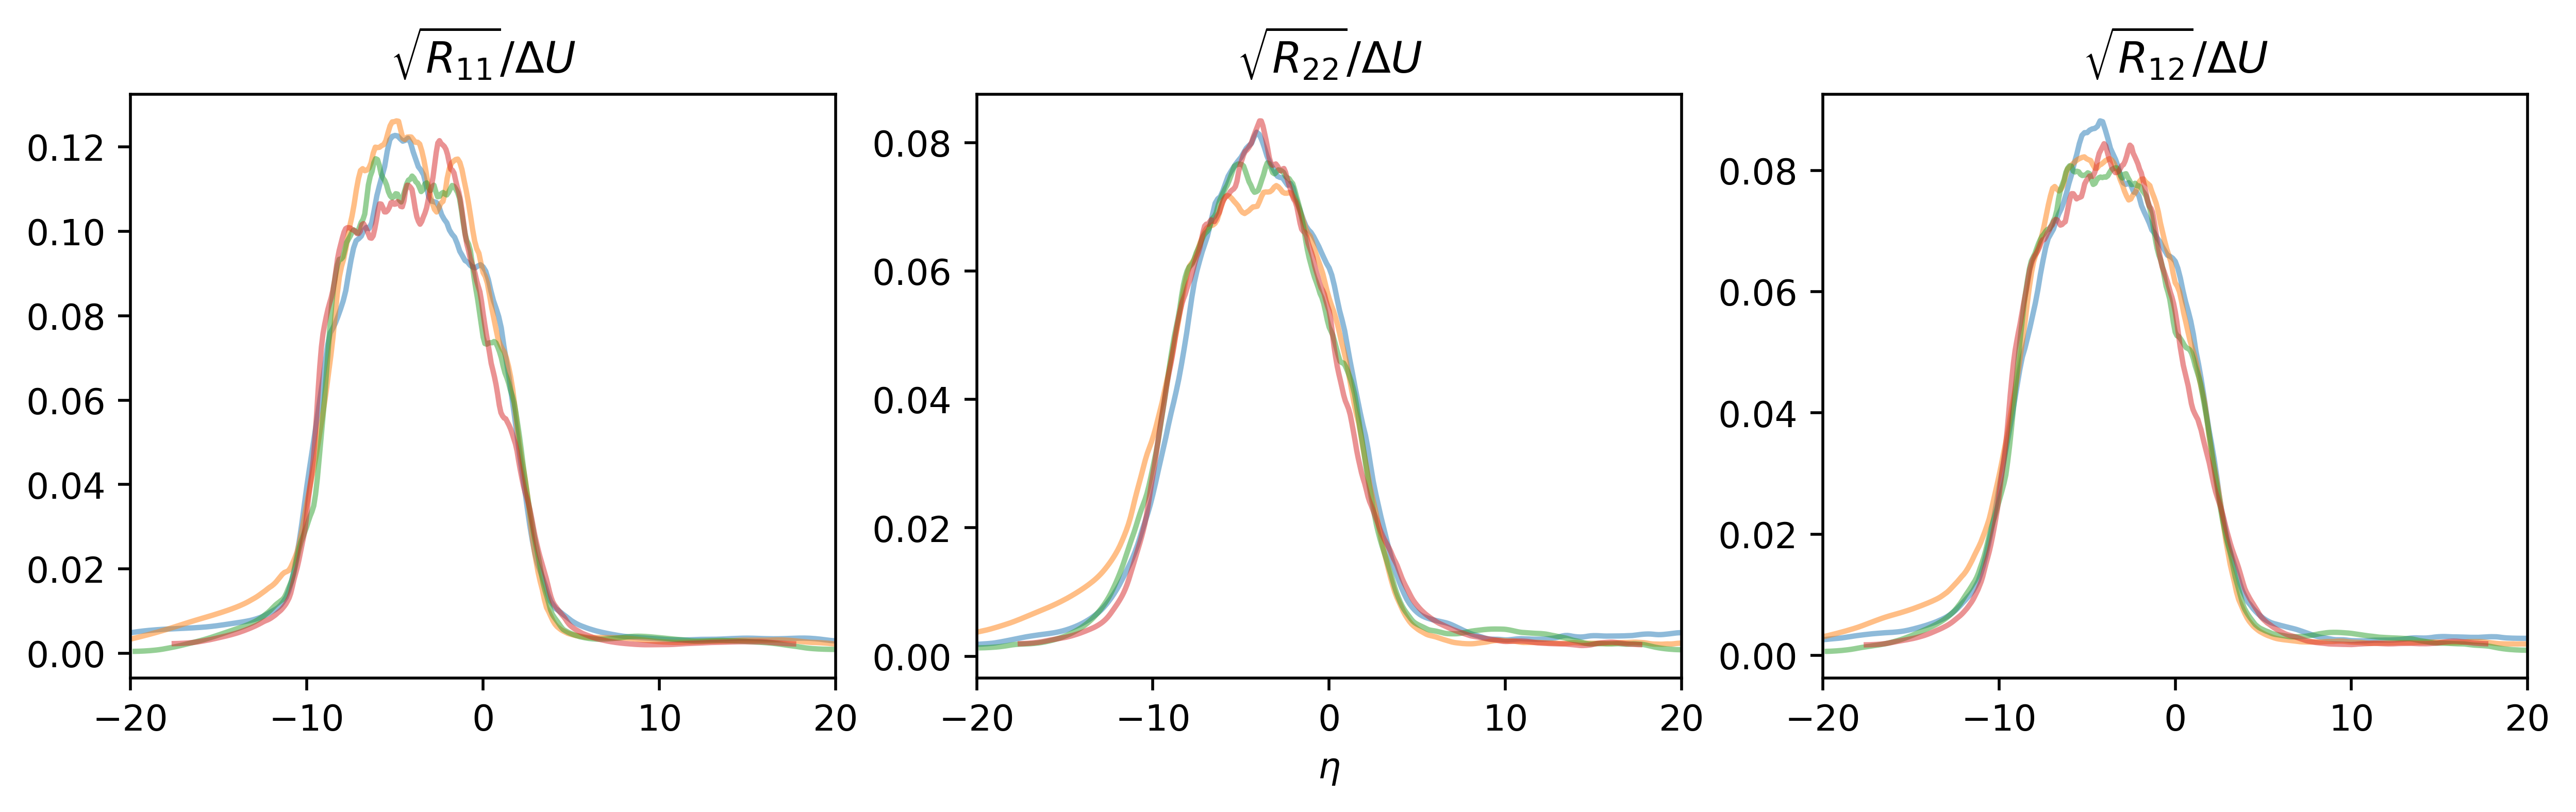

In [40]:
# Plot R11,R22,R12 stress profiles
fig, ax = plt.subplots(1,3, figsize=(12,3), dpi=500)

ts = 40#60
te = 60#75
for step in range(ts,te,5):
    reader.step = step
    q = reader.readData(('u','v','w'))
    q = np.array(q)
    u = q[0,:,:,:]
    v = q[1,:,:,:]
    #w = q[2,:,:,:]
    ubar = mean_xz(u)
    vbar = mean_xz(v)
    #wbar = mean_xz(w)
    uprime1D = u - ubar[None,:,None];
    vprime1D = v - vbar[None,:,None];
    #wprime1D = w - wbar[None,:,None];
    
    uu = mean_xz(abs(uprime1D))
    vv = mean_xz(abs(vprime1D))
    #ww = mean_xz(abs(wprime1D))
    uv = mean_xz(np.sqrt(abs(uprime1D)*abs(vprime1D)))

    U1 = ubar[Ny-1]
    U2 = ubar[0]
    du = U1-U2
    
    ax[0].plot(yplot/dtheta[step-id_shift],uu/du,alpha=0.5)
    ax[1].plot(yplot/dtheta[step-id_shift],vv/du,alpha=0.5)
    ax[2].plot(yplot/dtheta[step-id_shift],uv/du,alpha=0.5)

ax[0].set_title('$\sqrt{R_{11}}/\Delta U$')
ax[1].set_title('$\sqrt{R_{22}}/\Delta U$')
ax[2].set_title('$\sqrt{R_{12}}/\Delta U$')
ax[1].set_xlabel('$\eta$')

for a in ax:
    a.set_xlim([-20,20])
